
**Taking** 8000 flair edge  blended images having scaling as the fourth transformation and applying model for the same without any regularisation.
Images used were from fifth dataset.
The scaling for theta is 20 and for scaled factor is 5.
drive>sixth_dataset.
The model was trained using saved weights from the fifth dataset trained model for flair edge images.

In [ ]:
# First, we import the necessary libraries
import itertools
# import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input,AveragePooling2D,Activation,Conv2D,MaxPooling2D,BatchNormalization

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
from tensorflow.keras.activations import tanh
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
import numpy as np
import pandas as pd
import glob
import cv2
import os
import random
from skimage.transform import AffineTransform, warp
import matplotlib.pyplot as plt

In [ ]:
# pip install tensorboardcolab

# tbc=TensorBoardColab()

In [ ]:
import matplotlib.pyplot as plt
def show2(img1, img2):
    fig = plt.figure(figsize=(10,15))
    ax1 = fig.add_subplot(221)  # left side image
    ax2 = fig.add_subplot(222)  # right side image
    ax1.imshow(img1, cmap='gray')
    ax2.imshow(img2, cmap='gray')
    plt.show()
    
def show4(img1, img2, img3, img4):
    fig = plt.figure(figsize=(15,15))
    ax1 = fig.add_subplot(221)  
    ax2 = fig.add_subplot(222)  
    ax3 = fig.add_subplot(223)  
    ax4 = fig.add_subplot(224) 
    ax1.imshow(img1, cmap='gray')
    ax2.imshow(img2, cmap='gray')
    ax3.imshow(img3, cmap='gray')
    ax4.imshow(img4, cmap='gray')
    plt.show()

In [ ]:
# Defining a custom loss function involving the transformation matrix:
def model_loss(y_true, y_pred):
    #difference between true label and predicted label
    error = y_true-y_pred        
    #square of the error
    sqr_error = K.square(error)    #mean of the square of the error
    mean_sqr_error = K.mean(sqr_error)    #square root of the mean of the square of the error
    return mean_sqr_error

In [ ]:
# Mounting drive to the colab in order to load data from the drive
MODE = "UNMOUNT" #@param ["MOUNT", "UNMOUNT"]
#Mount your Gdrive! 
from google.colab import drive
drive.mount._DEBUG = False
if MODE == "MOUNT":
  drive.mount('/content/drive', force_remount=True)
elif MODE == "UNMOUNT":
  try:
    drive.flush_and_unmount()
  except ValueError:
    pass
  get_ipython().system_raw("rm -rf /root/.config/Google/DriveFS")

Drive not mounted, so nothing to flush and unmount.


In [ ]:
# Mount the google drive data 
from google.colab import drive
drive.mount('/content/drive')
  

Mounted at /content/drive


In [ ]:
#!unzip /content/drive/MyDrive/Data_with_scaling/Flair_blended_30_10.rar > /dev/null

In [ ]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts


In [ ]:
#!unzip /content/drive/MyDrive/Flair_edge_scaled_data/blended_flair.zip
!unrar x  "//content/drive/MyDrive/Sixth_dataset/Blended_train_flair.rar" #"//content/drive/MyDrive/Edge flair 10000/"

Streaming output truncated to the last 5000 lines.
Extracting  Blended_train_flair/blended_train6_flair37.png                38%  OK 
Extracting  Blended_train_flair/blended_train6_flair370.png               38%  OK 
Extracting  Blended_train_flair/blended_train6_flair3700.png              38%  OK 
Extracting  Blended_train_flair/blended_train6_flair3701.png              38%  OK 
Extracting  Blended_train_flair/blended_train6_flair3702.png              38%  OK 
Extracting  Blended_train_flair/blended_train6_flair3703.png              38%  OK 
Extracting  Blended_train_flair/blended_train6_flair3704.png              38%  OK 
Extracting  Blended_train_flair/blended_train6_flair3705.png              38%  OK 
Extracting  Blended_train_flair/blended_train6_flair3706.png              38%  OK 
Extracting  Blended_train_flair/blended_train6_flair3707.png              38%  OK 
Extracting  Blended_train_fla

In [ ]:
!unrar x  "//content/drive/MyDrive/Sixth_dataset/Blended_val_flair.rar" #"//content/drive/MyDrive/Edge flair 10000/test/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from //content/drive/MyDrive/Sixth_dataset/Blended_val_flair.rar

Creating    Blended_val_flair                                         OK
Extracting  Blended_val_flair/blended_val6_flair_edge_0.png                0%  OK 
Extracting  Blended_val_flair/blended_val6_flair_edge_1.png                0%  OK 
Extracting  Blended_val_flair/blended_val6_flair_edge_10.png               0%  OK 
Extracting  Blended_val_flair/blended_val6_flair_edge_100.png              0%  OK 
Extracting  Blended_val_flair/blended_val6_flair_edge_101.png              0%  OK 
Extracting  Blended_val_flair/blended_val6_flair_edge_102.png              0%  OK 
Extracting  Blended_val_flair/blended_val6_flair_edge_103.png              0%  OK 
Extracting  Blended_val_flair/blended_val6_flair_edge_104.png              0%  OK 
Extracting  Blended_val_flair/blended_val6_fl

In [ ]:
#Takes very long time to load data. Instead of this use ImageDataGenerator
x_train = []
for file in sorted(glob.glob("//content/Blended_train_flair/*.png"), key=numericalSort):
    img = cv2.imread(file)
#     img = img/255
    x_train.append(img)

In [ ]:
#x_train = x_train[0:3000]

In [ ]:
len(x_train)

8000

In [ ]:
x_val = []
for file in sorted(glob.glob("//content/Blended_val_flair/*.png"), key=numericalSort):
    img = cv2.imread(file)
#     img = img/255
    x_val.append(img)

In [ ]:
len(x_val)

1000

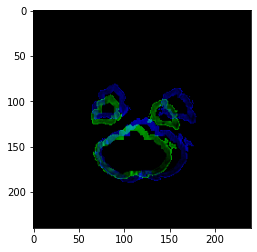

In [ ]:
plt.imshow(x_train[11])

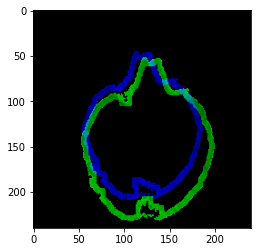

In [ ]:
plt.imshow(x_val[11])

In [ ]:
# We normalize our data and convert the labels to one hot encoding
x_train=np.array(x_train)
x_val=np.array(x_val)

In [ ]:
x_train=x_train/255.0
x_val=x_val/255.0

In [ ]:
# Loading train transformation data from the google drive
y_train = pd.read_csv("//content/drive/MyDrive/Sixth_dataset/train_transforms_6.csv")


In [ ]:
# Loading test transformation data from the google drive
y_val = pd.read_csv("//content/drive/MyDrive/Sixth_dataset/val_transforms_6.csv")

In [ ]:
y_train.head()

,tx,ty,theta_cc,scaling
0,9.085223,-2.703275,0.085983,0.885645
1,2.157208,4.719916,0.105496,0.870750
2,-8.772098,-9.384810,-0.046053,0.986361
3,3.964056,7.335776,-0.069309,0.956899
4,-8.196705,-1.239634,-0.019025,0.871233


In [ ]:
y_val.head()

,tx,ty,theta_cc,scaling
0,-5.146467,-0.452334,0.067941,0.879651
1,-1.734995,-8.143414,-0.035162,0.845030
2,-5.693612,6.787731,0.110458,0.976053
3,6.372101,-6.132142,0.050144,1.036524
4,-4.245696,4.029883,-0.081879,0.886862


In [ ]:
# Normalising Train Transform Data
aa = y_train['theta_cc']
y2 = aa * 20
y_train.theta_cc = y2

In [ ]:
bb = y_train['scaling']
y3 = bb * 5
y_train.scaling= y3

In [ ]:
y_train.head()

,tx,ty,theta_cc,scaling
0,9.085223,-2.703275,1.719656,4.428226
1,2.157208,4.719916,2.109929,4.353752
2,-8.772098,-9.384810,-0.921070,4.931803
3,3.964056,7.335776,-1.386174,4.784494
4,-8.196705,-1.239634,-0.380496,4.356165


In [ ]:
# Normalising Test Transform Data
yy = y_val['theta_cc']
y1 = yy * 20
y_val.theta_cc = y1


In [ ]:
cc = y_val['scaling']
y4 = cc * 5
y_val.scaling= y4

In [ ]:
# y_train1 = y_train[0:3000]
# y_test1 = y_test[0:300]

In [ ]:
y_train1 = [list(row) for row in y_train.values]
y_val1 = [list(row) for row in y_val.values]

In [ ]:
y_train1 = np.array(y_train1)
y_val1 = np.array(y_val1)

In [ ]:
len(y_train1)

8000

In [ ]:
from keras.layers import Conv2D
from keras.regularizers import l2
from keras.regularizers import l1

In [ ]:

tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')

In [ ]:
# Creating Densenet121
def densenet(input_shape, n_classes, filters = 32):
    
    #batch norm + relu + conv
    def bn_rl_conv(x,filters,kernel=1,strides=1):
        
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters, kernel,strides=strides,padding = 'same')(x)
        return x
    
    def dense_block(x, repetition):
        
        for _ in range(repetition):
            y = bn_rl_conv(x, 4*filters)
            y = bn_rl_conv(y, filters, 3)
            x = concatenate([y,x])
        return x
        
    def transition_layer(x):
        
        x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
        x = AvgPool2D(2, strides = 2, padding = 'same')(x)
        return x
    
    input = Input (input_shape)
    x = Conv2D(64, 7, strides = 2, padding = 'same')(input)
    x = MaxPool2D(3, strides = 2, padding = 'same')(x)
    
    for repetition in [6,12,24,16]:
        
        d = dense_block(x, repetition)
        x = transition_layer(d)    
    x = GlobalAveragePooling2D()(d)
    output = Dense(n_classes)(x)
    
    model = Model(input, output)
    return model
input_shape = 240, 240, 3
n_classes = 4
model = densenet(input_shape,n_classes)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 120, 120, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 60, 60, 64)   0           ['conv2d[0][0]']                 
                                                                                              

In [ ]:
model.load_weights("//content/drive/MyDrive/Fifth_dataset/Saved_weights/15_11_Scaled_data_model_running_8000_flair_edge_From_dataset5_with_weights_from_dataset4_flair_edge.h5")

In [ ]:
model.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train1,epochs=40,batch_size=8, validation_data=(x_val,y_val1))

Epoch 1/40
1000/1000 [==============================] - 118s 91ms/step - loss: 0.4783 - accuracy: 0.9254 - val_loss: 0.5604 - val_accuracy: 0.9230
Epoch 2/40
1000/1000 [==============================] - 87s 87ms/step - loss: 0.2712 - accuracy: 0.9444 - val_loss: 0.5949 - val_accuracy: 0.9200
Epoch 3/40
1000/1000 [==============================] - 86s 86ms/step - loss: 0.1867 - accuracy: 0.9540 - val_loss: 0.5147 - val_accuracy: 0.9320
Epoch 4/40
1000/1000 [==============================] - 86s 86ms/step - loss: 0.1391 - accuracy: 0.9624 - val_loss: 0.5313 - val_accuracy: 0.9300
Epoch 5/40
1000/1000 [==============================] - 87s 87ms/step - loss: 0.1220 - accuracy: 0.9663 - val_loss: 0.5347 - val_accuracy: 0.9310
Epoch 6/40
1000/1000 [==============================] - 87s 87ms/step - loss: 0.1121 - accuracy: 0.9649 - val_loss: 0.5002 - val_accuracy: 0.9250
Epoch 7/40
1000/1000 [==============================] - 86s 86ms/step - loss: 0.1017 - accuracy: 0.9635 - val_loss: 0.5278 

In [ ]:
model.save_weights("//content/drive/MyDrive/Sixth_dataset/saved_weights/22_11_Scaled_data_model_running_8000_flair_edge_From_dataset6_with_weights_from_dataset5_flair_edge.h5")

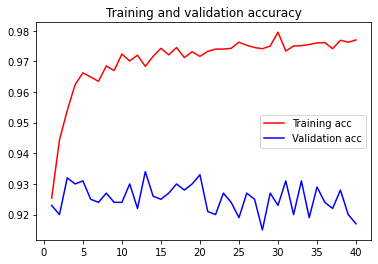

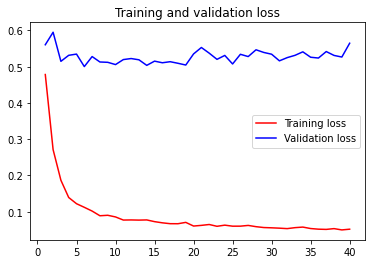

In [ ]:
# Plot the model performance

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc,'r-', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


<Figure size 432x288 with 0 Axes>

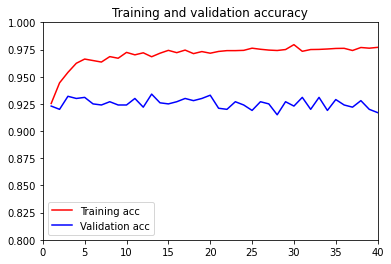

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the model performance

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc,'r-', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlim(0,40)
plt.ylim(0.8,1)
plt.legend()
plt.figure()

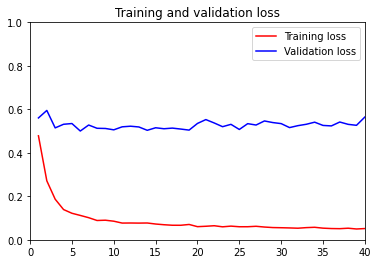

In [ ]:
plt.plot(epochs, loss,'r-', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlim(0,40)
plt.ylim(0,1)
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('//content/drive/MyDrive/Fifth_dataset/Saved_models/22_11_dataset5_8000_flair_edge_images_model_trained_with_pretrained_weights_from_fifth_dataset')

INFO:tensorflow:Assets written to: //content/drive/MyDrive/Fifth_dataset/Saved_models/22_11_dataset5_8000_flair_edge_images_model_trained_with_pretrained_weights_from_fifth_dataset/assets


In [ ]:
#!unrar x  "//content/drive/MyDrive/Second_dataset/Data_for_prediction/Blended_test_edge_binarised.rar" #"//content/drive/MyDrive/Edge flair 10000/"


In [ ]:
!unrar x  "//content/drive/MyDrive/Second_dataset/Data_for_prediction/Blended_test_edge_flair.rar" #"//content/drive/MyDrive/Edge flair 10000/"



UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from //content/drive/MyDrive/Second_dataset/Data_for_prediction/Blended_test_edge_flair.rar

Creating    Blended_test_edge_flair                                   OK
Extracting  Blended_test_edge_flair/blended_test_fl_edge_0.png             0%  OK 
Extracting  Blended_test_edge_flair/blended_test_fl_edge_1.png             0%  OK 
Extracting  Blended_test_edge_flair/blended_test_fl_edge_10.png            0%  OK 
Extracting  Blended_test_edge_flair/blended_test_fl_edge_100.png           0%  OK 
Extracting  Blended_test_edge_flair/blended_test_fl_edge_101.png           0%  OK 
Extracting  Blended_test_edge_flair/blended_test_fl_edge_102.png           0%  OK 
Extracting  Blended_test_edge_flair/blended_test_fl_edge_103.png           0%  OK 
Extracting  Blended_test_edge_flair/blended_test_fl_edge_104.png           0%  OK 
Extracting  Blende

In [ ]:
# test images
x_test = []
for file in sorted(glob.glob("//content/Blended_test_edge_flair/*.png"), key=numericalSort):
    img = cv2.imread(file)
#     img = img/255
    x_test.append(img)

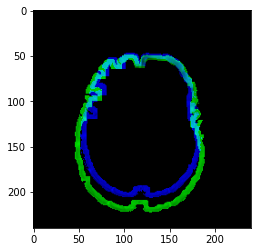

In [ ]:
plt.imshow(x_test[22])

In [ ]:
# We normalize our data and convert the labels to one hot encoding
x_test =np.array(x_test)


In [ ]:
x_test=x_test/255.0


In [ ]:
predictions = []
for i in range(1000):
    img_array = tf.keras.preprocessing.image.img_to_array(x_test[i])
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    prediction = model.predict(img_array)
    predictions.append(prediction)


In [ ]:
predictions[1]

array([[-6.4842257 ,  5.005479  ,  0.04971949,  4.4530888 ]],
      dtype=float32)

In [ ]:
predictions[1][0][2]

0.16435112

In [ ]:
# For predicted validation transformations
os.chdir('//content/drive/MyDrive/Sixth_dataset/Predicted_transforms')
tf1 = []

for i in range(len(predictions)):
    tf1.append((predictions[i][0][0],predictions[i][0][1],predictions[i][0][2],predictions[i][0][3]))
import csv 
Details = ['tx', 'ty','theta','scaling']  
rows = tf1
with open('22_11_Predicted_transforms_for_dataset5_flair_edge_pretrained_weights_from_dataset5_for_40_epochs.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerow(Details) 
    write.writerows(rows) 